In [1]:
import tensorflow as tf
import os

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 


In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    label_mode='categorical'
)

Found 600 files belonging to 8 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

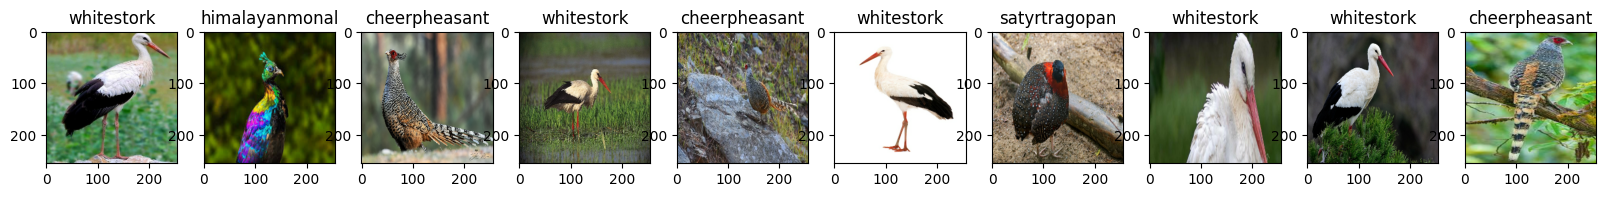

In [12]:
class_names = ['bengalflorican', 'blackstork', 'cheerpheasant', 'greathornbill', 'himalayanmonal', 'saruscrane', 'satyrtragopan', 'whitestork']

fig, ax = plt.subplots(ncols=10, figsize=(20, 20))
for idx, img in enumerate(batch[0][:10]):
    label_index = np.argmax(batch[1][idx])  
    class_name = class_names[label_index]  
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_name)

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.5100511 , 0.592404  , 0.3723366 ],
          [0.53227633, 0.6203492 , 0.36005214],
          [0.5583282 , 0.6446027 , 0.3936223 ],
          ...,
          [0.63367033, 0.6768076 , 0.44632354],
          [0.5724418 , 0.6418291 , 0.4037837 ],
          [0.51979166, 0.6214461 , 0.38238358]],
 
         [[0.48235294, 0.5777267 , 0.34149817],
          [0.50341904, 0.6060079 , 0.32757652],
          [0.5139401 , 0.6132354 , 0.3525277 ],
          ...,
          [0.5913143 , 0.65594363, 0.41155025],
          [0.5714154 , 0.65684444, 0.40562195],
          [0.52644914, 0.6284099 , 0.380095  ]],
 
         [[0.41672793, 0.51868874, 0.27184436],
          [0.44915724, 0.55896115, 0.2687651 ],
          [0.52496934, 0.6308517 , 0.3543713 ],
          ...,
          [0.5322457 , 0.62192094, 0.3555147 ],
          [0.49947917, 0.6048407 , 0.33451286],
          [0.4898028 , 0.59219265, 0.33700466]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
val_size

4

In [17]:
train_size+val_size+test_size

19

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [20]:
num_classes = 8

model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  

In [22]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 33s 1s/step - loss: 2.1537 - accuracy: 0.1562 - val_loss: 1.9478 - val_accuracy: 0.3359
Epoch 2/20
13/13 [==============================] - 19s 1s/step - loss: 1.9094 - accuracy: 0.3053 - val_loss: 1.7209 - val_accuracy: 0.4219
Epoch 3/20
13/13 [==============================] - 18s 1s/step - loss: 1.5671 - accuracy: 0.4639 - val_loss: 1.3054 - val_accuracy: 0.5234
Epoch 4/20
13/13 [==============================] - 14s 796ms/step - loss: 1.2964 - accuracy: 0.6082 - val_loss: 0.9512 - val_accuracy: 0.7266
Epoch 5/20
13/13 [==============================] - 7s 446ms/step - loss: 1.1074 - accuracy: 0.6755 - val_loss: 0.9692 - val_accuracy: 0.6953
Epoch 6/20
13/13 [==============================] - 7s 474ms/step - loss: 0.8786 - accuracy: 0.7163 - val_loss: 0.6074 - val_accuracy: 0.8750
Epoch 7/20
13/13 [==============================] - 7s 419ms/step - loss: 0.6193 - accuracy: 0.7933 - val_loss: 0.7321 - val_accuracy: 0.7891
Epoch 8/20


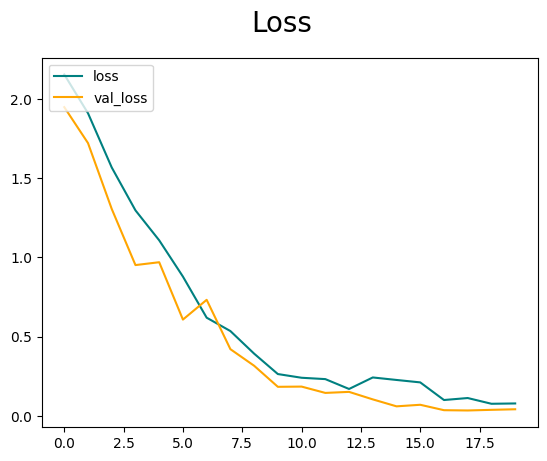

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

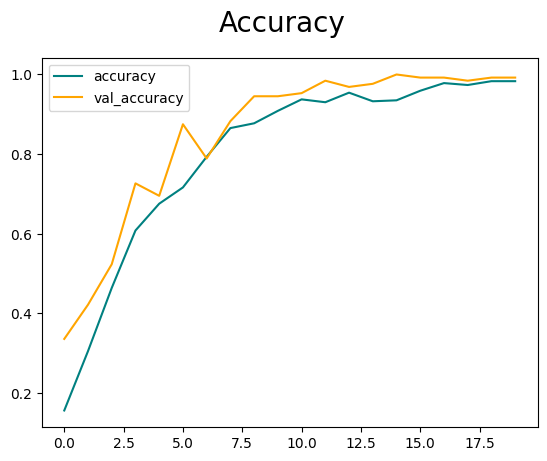

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

acc = CategoricalAccuracy()
pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

print("Categorical Accuracy:", acc.result().numpy())
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())

1/1 [==============================] - 0s 35ms/step
Categorical Accuracy: 1.0
Precision: 1.0
Recall: 1.0


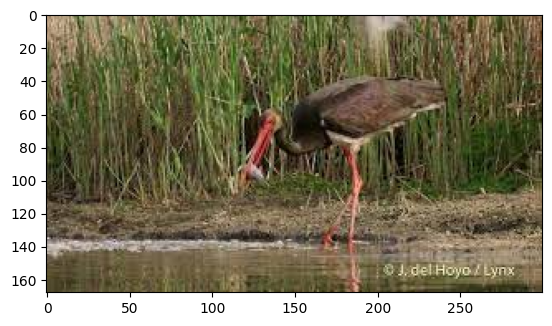

In [57]:
bgr_img = cv2.imread('blackcranetest.jpg')
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

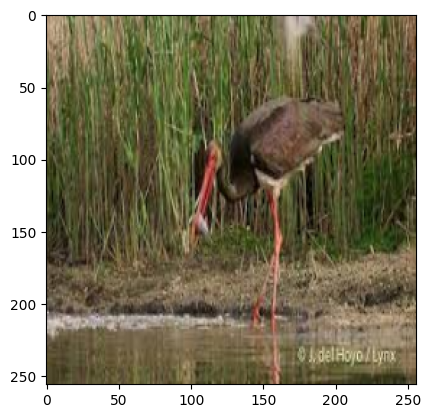

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
np.expand_dims(resize,0).shape
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 39ms/step


array([[4.4131268e-02, 2.9773200e-01, 2.1437246e-02, 5.6849653e-01,
        2.9360792e-02, 3.9460760e-04, 2.3389000e-02, 1.5058606e-02]],
      dtype=float32)

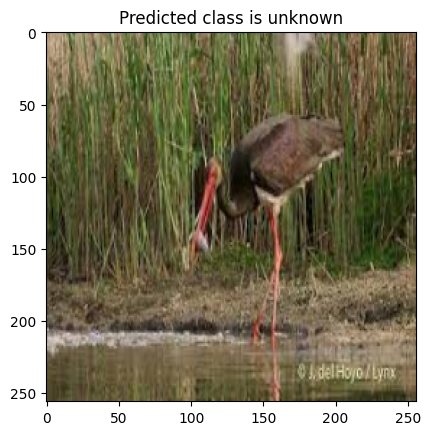

In [60]:
threshold = 0.8

predicted_class_index = np.argmax(yhat)

max_confidence = yhat[0][predicted_class_index]

fallback_class = 'unknown'  
if max_confidence < threshold:
    predicted_class = fallback_class
else:
    predicted_class = class_names[predicted_class_index]

plt.imshow(resize.numpy().astype(int))
plt.title(f'Predicted class is {predicted_class}')
plt.show()

###### 

In [34]:
# from tensorflow.keras.models import load_model
# model.save(os.path.join('models','birdimagemodel2.h5'))

In [35]:
# new_model = load_model(os.path.join('models','birdimagemodel2.h5'))
# new_model.predict(np.expand_dims(resize/255, 0))

In [36]:
# converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
# tflite_model = converter.convert()

In [37]:
# tflite_model_path = os.path.join('models','birdimagemodel2.tflite')
# tf.io.write_file(tflite_model_path, tflite_model)